In [1]:
import sqlite3
print(sqlite3.sqlite_version)

3.37.0


### Loading + Cleaning Dataset

In [2]:
import pandas as pd

df = pd.read_csv("dataset.csv")
print(df.shape)
df.head()

(895, 310)


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,102001,0,United States,country,NaN,124341.456204,124560.212686,124831.502934,125413.367265,126083.023349,...,366082.534618,366541.033973,367139.889484,367641.575813,368374.194231,369014.892386,369482.288322,369202.386239,368665.574321,367968.705738
1,394913,1,"New York, NY",msa,NY,222144.732358,223088.722133,224041.454953,225972.060310,227971.269013,...,684259.382386,688392.137956,692009.202648,694852.796493,696684.019029,697783.971423,699099.865036,700827.952338,703306.775318,705107.625540
2,753899,2,"Los Angeles, CA",msa,CA,227474.670293,228321.164684,229448.687139,231692.078064,234145.644428,...,968498.303263,975119.777398,980502.547890,985140.366842,989285.868299,989838.113917,987754.657488,982522.486549,978090.511332,973190.303272
3,394463,3,"Chicago, IL",msa,IL,157959.146515,158105.370670,158383.857148,159076.662297,159910.023559,...,332736.334132,333770.643414,334778.577839,335849.144693,337135.023459,338519.797594,339906.122978,340776.962637,341395.613655,341694.770054
4,394514,4,"Dallas, TX",msa,TX,130592.692029,130650.858471,130717.726749,130891.376645,131120.329279,...,385874.026936,385669.188552,385559.561280,385261.052237,384718.564925,384177.312312,383371.622567,381834.215592,379657.813133,377185.670539


In [3]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("missing vals: \n", missing)

missing vals: 
 2000-01-31    464
2000-02-29    463
2000-03-31    462
2000-04-30    460
2000-05-31    458
             ... 
2017-07-31      1
2017-08-31      1
2017-09-30      1
2017-10-31      1
2022-09-30      1
Length: 241, dtype: int64


In [4]:
# Performing Imputation - Linear interpolation (timewise)
date_cols = df.columns[df.columns.str.match(r'\d{4}-\d{2}-\d{2}$')]

for i in range(1, len(date_cols)-1):
    prev_col = date_cols[i - 1]
    curr_col = date_cols[i]
    next_col = date_cols[i + 1]
    df[curr_col] = df[curr_col].mask(df[curr_col].isna(), (df[prev_col] + df[next_col]) / 2)

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("missing vals: \n", missing)

missing vals: 
 2000-01-31    464
2000-02-29    463
2000-03-31    462
2000-04-30    460
2000-05-31    458
             ... 
2017-05-31      1
2017-06-30      1
2017-07-31      1
2017-08-31      1
2021-08-31      1
Length: 238, dtype: int64


In [6]:

missing = df[df[date_cols].isna().any(axis=1)]
pd.set_option('display.max_columns', None)
missing

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
11,394976,11,"Phoenix, AZ",msa,AZ,144801.916307,145095.762487,145482.746308,146277.461559,147151.331855,147894.22305,148632.495422,149327.266167,150115.511846,150851.259284,151585.686709,152313.772221,153009.870607,153686.20292,154355.758253,155040.23296,155726.970814,156394.44098,157010.888607,157608.905957,158207.645382,158865.802254,159583.780339,160252.61894,160802.230996,161269.298902,161794.623781,162388.271198,162960.247968,163607.597914,164314.340479,165176.805373,165896.504828,166591.968448,167199.242317,167897.663351,168560.166316,169260.740266,169876.343920,170567.621185,17126

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 310 entries, RegionID to 2025-05-31
dtypes: float64(305), int64(2), object(3)
memory usage: 2.1+ MB


In [8]:
df["RegionType"].unique()
df.drop(columns = "RegionType", inplace=True)
df.head()

,RegionID,SizeRank,RegionName,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31
0,102001,0,United States,NaN,124341.456204,124560.212686,124831.502934,125413.367265,126083.023349,126800.984926,127561.446863,128382.291517,129236.115685,130093.191835,130946.163691,131800.287662,132584.324546,133278.675773,133948.388528,134672.496924,135453.920524,136255.644348,137080.588814,137942.409027,138811.917302,139677.689427,140484.633698,141241.159957,141910.238305,142550.197876,143202.607886,143912.404658,144696.388650,145545.599159,146476.584696,147470.569175,148477.773752,149483.455891,150441.298353,151373.786168,152217.640609,153025.088977,153832.100156,154710.678449,155677.339938,15

In [9]:
#finding rows with all null values
price_cols = df.columns[4:]
all_null_row = df[price_cols].isnull().all(axis=1)
null_rows_df = df[all_null_row]
null_rows_df.head()
# NO row with "all null" values exist in df

,RegionID,SizeRank,RegionName,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31


In [10]:
#Next step, melt df to long format 
long_df = df.melt(
    id_vars = ["RegionID", "SizeRank", "RegionName", "StateName"],
    var_name = "Date",
    value_name = "ZHVI" #Zillow Home Value Index
)
long_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,ZHVI
0,102001,0,United States,NaN,2000-01-31,124341.456204
1,394913,1,"New York, NY",NY,2000-01-31,222144.732358
2,753899,2,"Los Angeles, CA",CA,2000-01-31,227474.670293
3,394463,3,"Chicago, IL",IL,2000-01-31,157959.146515
4,394514,4,"Dallas, TX",TX,2000-01-31,130592.692029


In [11]:
'''# Since SizeRank is unique, we can treat it as identifier/index
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('SizeRank')))
df = df[cols]
df = df.set_index('SizeRank')
df.head(5)
'''

"# Since SizeRank is unique, we can treat it as identifier/index\ncols = df.columns.tolist()\ncols.insert(0, cols.pop(cols.index('SizeRank')))\ndf = df[cols]\ndf = df.set_index('SizeRank')\ndf.head(5)\n"

In [12]:
#Melting to long-format
id_cols = ['RegionID', 'SizeRank', 'RegionName', 'StateName']
long_df = df.melt(id_vars=id_cols, value_vars=date_cols, var_name='Date', value_name = 'ZHVI')
long_df['Date'] = pd.to_datetime(long_df['Date'])
long_df = long_df.reset_index(drop=True)
long_df.head()


,RegionID,SizeRank,RegionName,StateName,Date,ZHVI
0,102001,0,United States,NaN,2000-01-31,124341.456204
1,394913,1,"New York, NY",NY,2000-01-31,222144.732358
2,753899,2,"Los Angeles, CA",CA,2000-01-31,227474.670293
3,394463,3,"Chicago, IL",IL,2000-01-31,157959.146515
4,394514,4,"Dallas, TX",TX,2000-01-31,130592.692029


In [13]:
long_df.isna().sum()

RegionID          0
SizeRank          0
RegionName        0
StateName       305
Date              0
ZHVI          49178
dtype: int64

In [14]:
#flagging missing ZHVI - Models will learn better later (0 - not missing | 1 - missing)
long_df['ZHVI_missing'] = long_df['ZHVI'].isna().astype(int)
long_df.head(5)


,RegionID,SizeRank,RegionName,StateName,Date,ZHVI,ZHVI_missing
0,102001,0,United States,NaN,2000-01-31,124341.456204,0
1,394913,1,"New York, NY",NY,2000-01-31,222144.732358,0
2,753899,2,"Los Angeles, CA",CA,2000-01-31,227474.670293,0
3,394463,3,"Chicago, IL",IL,2000-01-31,157959.146515,0
4,394514,4,"Dallas, TX",TX,2000-01-31,130592.692029,0


In [15]:
#We have StateName missing
state_na = long_df["StateName"].isnull()
long_df.loc[state_na, "StateName"] = long_df.loc[state_na, "RegionName"].apply(lambda x: x.split(",")[-1].strip())
long_df.isna().sum()

RegionID            0
SizeRank            0
RegionName          0
StateName           0
Date                0
ZHVI            49178
ZHVI_missing        0
dtype: int64

### EDA

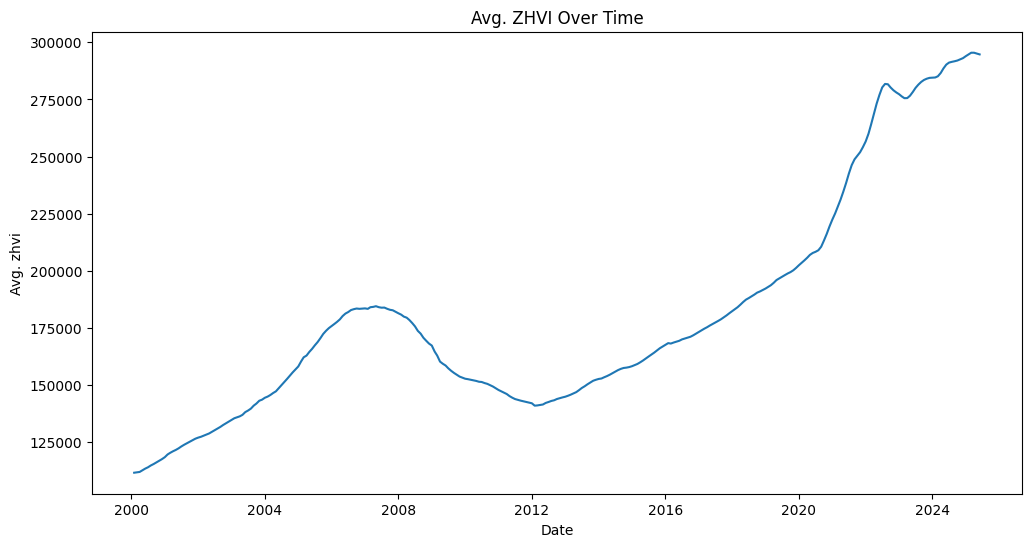

In [16]:
import matplotlib.pyplot as plt
avg_zhvi = long_df.groupby("Date")['ZHVI'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(avg_zhvi['Date'], avg_zhvi['ZHVI'])
plt.title('Avg. ZHVI Over Time')
plt.xlabel('Date')
plt.ylabel('Avg. zhvi')
plt.show()

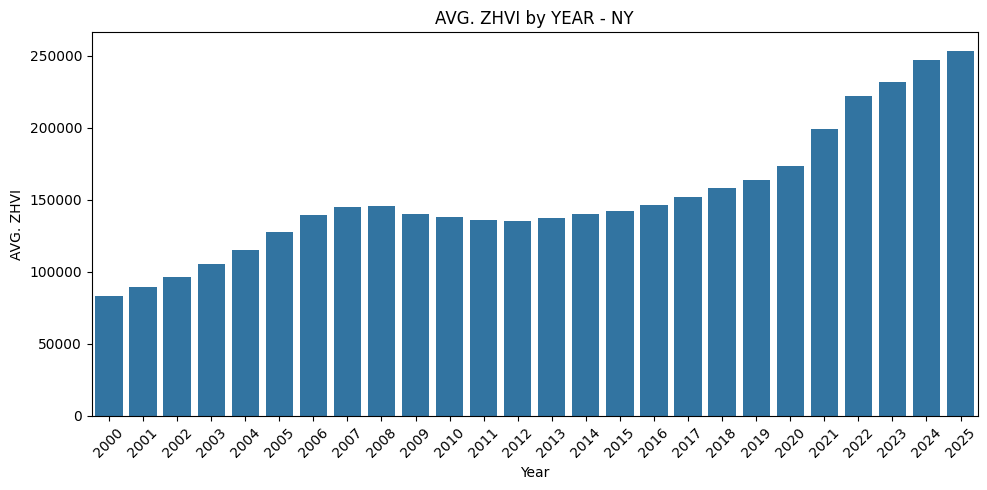

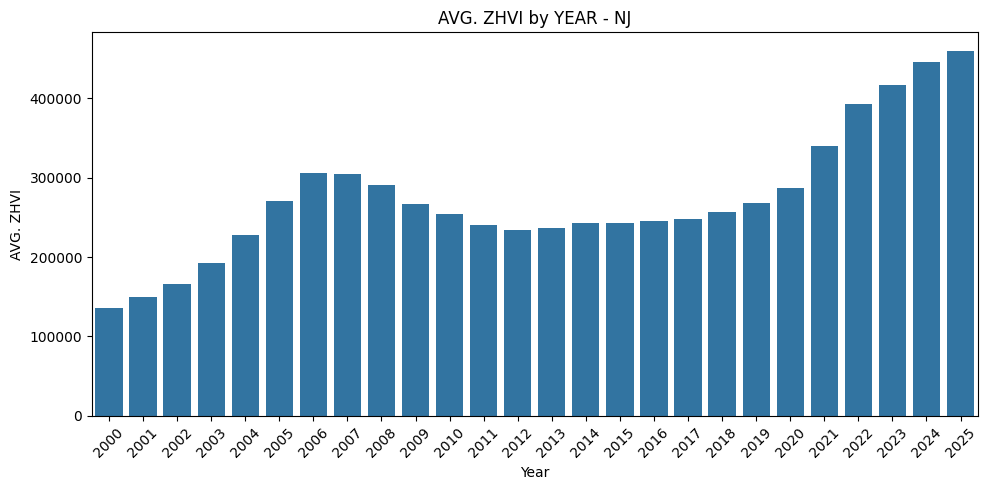

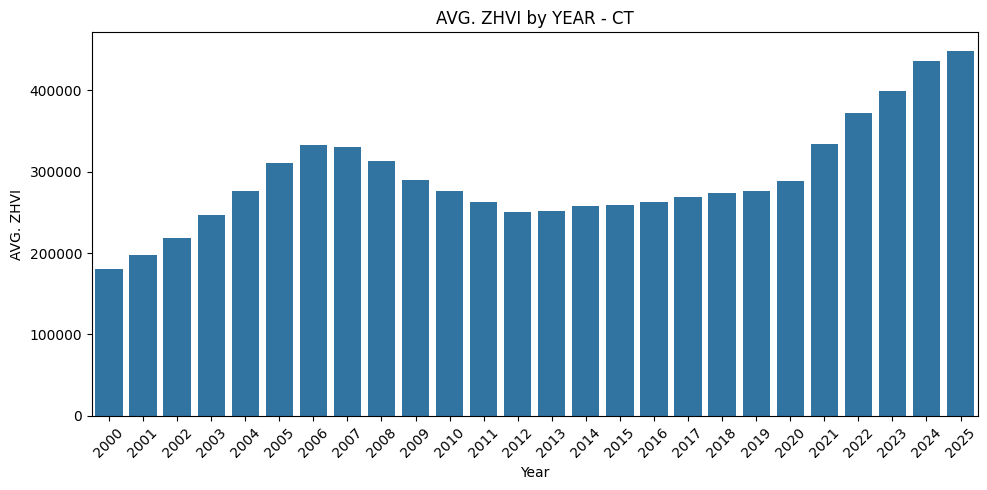

In [17]:
#tri states average ZHVI over the years
import seaborn as sns
long_df["Year"] = long_df["Date"].dt.year
yearly_state_avg = long_df.groupby(['StateName', 'Year'])['ZHVI'].mean().reset_index()

states = ['NY', 'NJ', 'CT']
for state in states:
    state_data = yearly_state_avg[yearly_state_avg['StateName'] == state]
    plt.figure(figsize=(10,5))
    sns.barplot(x='Year', y='ZHVI', data = state_data)
    plt.title(f'AVG. ZHVI by YEAR - {state}')
    plt.ylabel('AVG. ZHVI')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
   

In [18]:
conn = sqlite3.connect("housing_data.db")
cursor = conn.cursor()
long_df.to_sql("zhvi_metro", conn, if_exists="replace", index=False)
print("Data loaded in SQLite db.")
pd.read_sql_query("PRAGMA table_info(zhvi_metro);", conn)


Data loaded in SQLite db.


,cid,name,type,notnull,dflt_value,pk
0,0,RegionID,INTEGER,0,None,0
1,1,SizeRank,INTEGER,0,None,0
2,2,RegionName,TEXT,0,None,0
3,3,StateName,TEXT,0,None,0
4,4,Date,TIMESTAMP,0,None,0
5,5,ZHVI,REAL,0,None,0
6,6,ZHVI_missing,INTEGER,0,None,0
7,7,Year,INTEGER,0,None,0


In [19]:
#Querying the AVG. zhvi over the year for each states
query = """
SELECT
    StateName,
    STRFTIME('%Y', Date) AS YEAR,
    AVG(ZHVI) AS Avg_ZHVI
FROM zhvi_metro 
WHERE ZHVI IS NOT NULL
GROUP BY StateName, Year
ORDER BY StateName, Year;
"""

df_avg_zhvi = pd.read_sql_query(query, conn)
df_avg_zhvi.head(20)

,StateName,YEAR,Avg_ZHVI
0,AK,2000,140092.211421
1,AK,2001,161924.229017
2,AK,2002,177207.517612
3,AK,2003,186063.332992
4,AK,2004,199850.171195
5,AK,2005,223190.632960
6,AK,2006,242228.214716
7,AK,2007,253642.146923
8,AK,2008,255429.409210
9,AK,2009,253317.672019


In [20]:
#Top 10 Cities with Highest Average ZHVI - Identifying Premium Markets
query = """
SELECT
    RegionName,
    StateName,
    ROUND(AVG(ZHVI), 2) AS Avg_ZHVI
FROM zhvi_metro
WHERE ZHVI IS NOT NULL
GROUP BY RegionName, StateName
ORDER BY Avg_ZHVI DESC
LIMIT 10;
"""
df_top_10 = pd.read_sql_query(query, conn)
df_top_10.head(10)

,RegionName,StateName,Avg_ZHVI
0,"San Jose, CA",CA,854952.30
1,"Vineyard Haven, MA",MA,778581.00
2,"Jackson, WY",WY,764392.64
3,"Key West, FL",FL,736418.21
4,"San Francisco, CA",CA,709728.77
5,"Santa Cruz, CA",CA,699680.62
6,"Heber, UT",UT,640903.28
7,"Edwards, CO",CO,614437.01
8,"Napa, CA",CA,588071.29
9,"Santa Maria, CA",CA,578004.83


In [21]:
#How much home values increased each year than the year beforeby state (percentage)?
query = """
WITH yearly_avg AS (
    SELECT
        RegionName,
        StateName,
        STRFTIME('%Y', Date) AS YEAR,
        AVG(ZHVI) AS Avg_ZHVI
    FROM zhvi_metro
    WHERE ZHVI IS NOT NULL
    GROUP BY RegionName, StateName, Year
),

yearly_prev AS (
    SELECT
        curr.RegionName,
        curr.StateName,
        curr.Year,
        curr.Avg_ZHVI,
        prev.Avg_ZHVI AS Prev_Year_ZHVI,
        ROUND(100.0 * (curr.Avg_ZHVI - prev.Avg_ZHVI) / (1.0 * prev.Avg_ZHVI), 2) AS YoY_Growth_Percentage
    FROM yearly_avg  curr
    LEFT JOIN yearly_avg prev
        ON curr.RegionName = prev.RegionName
        AND curr.StateName = prev.StateName
        AND CAST(curr.Year AS INTEGER) = CAST(prev.Year AS INTEGER) + 1
)

SELECT * FROM yearly_prev
ORDER BY StateName, Year;
"""
YoY_percentage_increase = pd.read_sql(query, conn)
YoY_percentage_increase

,RegionName,StateName,Year,Avg_ZHVI,Prev_Year_ZHVI,YoY_Growth_Percentage
0,"Anchorage, AK",AK,2000,1.400922e+05,NaN,NaN
1,"Anchorage, AK",AK,2001,1.619242e+05,1.400922e+05,15.58
2,"Anchorage, AK",AK,2002,1.772075e+05,1.619242e+05,9.44
3,"Anchorage, AK",AK,2003,1.860633e+05,1.772075e+05,5.00
4,"Anchorage, AK",AK,2004,1.998502e+05,1.860633e+05,7.41
...,...,...,...,...,...,...
19309,"Jackson, WY",WY,2025,1.362238e+06,1.376636e+06,-1.05
19310,"Laramie, WY",WY,2025,3.736834e+05,3.534698e+05,5.72
19311,"Riverton, WY",WY,2025,3.145452e+05,3.054329e+05,2.98
19312,"Rock Springs, WY",WY,2025,2.948198e+05,2.791203e+05,5.62


In [22]:
#Highest Positive Growth Percentage
YoY_percentage_increase.sort_values(by="YoY_Growth_Percentage", ascending=False).head(10)


,RegionName,StateName,Year,Avg_ZHVI,Prev_Year_ZHVI,YoY_Growth_Percentage
4964,"Boise City, ID",ID,2021,471080.358689,346581.299468,35.92
3301,"Naples, FL",FL,2022,584519.060960,430637.018357,35.73
4974,"Sandpoint, ID",ID,2021,538150.396110,396622.829771,35.68
1414,"Bakersfield, CA",CA,2005,214423.739375,158379.356942,35.39
14272,"Ontario, OR",OR,2021,313077.198776,232904.461462,34.42
2810,"Crestview, FL",FL,2005,273943.550859,204216.911102,34.14
9715,"Kalispell, MT",MT,2021,495141.278649,369190.599797,34.12
4351,"Kapaa, HI",HI,2005,370470.963625,276952.320666,33.77
4971,"Mountain Home, ID",ID,2021,297888.961501,222814.842135,33.69
1090,"Payson, AZ",AZ,2006,199310.760341,150238.876584,32.66


In [23]:
#Negative Growth Percentage from its prev year
YoY_percentage_increase.sort_values(by="YoY_Growth_Percentage").head(10)
#2008 - 2009 which could be explained by the 2008 housing crisis

,RegionName,StateName,Year,Avg_ZHVI,Prev_Year_ZHVI,YoY_Growth_Percentage
1546,"Merced, CA",CA,2009,123495.111638,210209.581962,-41.25
1514,"Merced, CA",CA,2008,210209.581962,329282.409747,-36.16
1529,"Stockton, CA",CA,2008,262174.355489,405197.249819,-35.30
1515,"Modesto, CA",CA,2008,239934.246681,364502.265362,-34.17
1547,"Modesto, CA",CA,2009,161743.245004,239934.246681,-32.59
11488,"Las Vegas, NV",NV,2009,169961.188882,247545.725274,-31.34
1561,"Stockton, CA",CA,2009,182194.686014,262174.355489,-30.51
1565,"Vallejo, CA",CA,2009,236047.079000,339322.510277,-30.44
1553,"Salinas, CA",CA,2009,352288.035236,500868.670179,-29.66
1551,"Riverside, CA",CA,2009,205378.224890,290261.363774,-29.24


### Visualization

In [24]:
#!pip3 install plotly
#!pip3 install geopy

In [25]:
import plotly.express as px
from geopy.geocoders import Nominatim
import pandas as pd
import time

#getting the coordinations of each region based on RegionName
unique_regions = YoY_percentage_increase[['RegionName', 'StateName']].drop_duplicates().copy()
geolocator = Nominatim(user_agent='zhvi_mapper')
latitudes = []
longitudes = []

for idx, row in unique_regions.iterrows():
    location = geolocator.geocode(f"{row['RegionName']}, {row['StateName']}, USA", timeout=15)
    latitudes.append(location.latitude if location else None)
    longitudes.append(location.longitude if location else None)
    time.sleep(1)
unique_regions['Latitude'] = latitudes
unique_regions['Longitude'] = longitudes 

#NOW that we have coordinations of regions, we can merge data with the YoY data
YoY_with_coords = YoY_percentage_increase.merge(unique_regions, on=['RegionName', 'StateName'], how= 'left')

/Users/zuhalaziz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [26]:
unique_regions.to_csv("region_coords.csv", index=False)
YoY_with_coords.head()

,RegionName,StateName,Year,Avg_ZHVI,Prev_Year_ZHVI,YoY_Growth_Percentage,Latitude,Longitude
0,"Anchorage, AK",AK,2000,140092.211421,NaN,NaN,61.216313,-149.894852
1,"Anchorage, AK",AK,2001,161924.229017,140092.211421,15.58,61.216313,-149.894852
2,"Anchorage, AK",AK,2002,177207.517612,161924.229017,9.44,61.216313,-149.894852
3,"Anchorage, AK",AK,2003,186063.332992,177207.517612,5.00,61.216313,-149.894852
4,"Anchorage, AK",AK,2004,199850.171195,186063.332992,7.41,61.216313,-149.894852


In [27]:
YoY_with_coords['Year'] = YoY_with_coords['Year'].astype(str)
df_2025 = YoY_with_coords[YoY_with_coords['Year'] == '2025'].copy()
# Drop rows with missing latitude or longitude
df_2025_clean = df_2025.dropna(subset=['Latitude', 'Longitude'])

In [28]:
# Plot the cleaned data
import plotly.express as px

fig = px.scatter_geo(
    df_2025_clean,
    lat='Latitude',
    lon='Longitude',
    color='YoY_Growth_Percentage',
    hover_name='RegionName',
    scope='usa',
    title='YoY Growth % in Zillow Home Value Index (ZHVI) by Region (2025)'
)

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))
fig.show()

In [29]:
#Aggregated state-wise growth % compared to previous year so far based on the dataset
state_wise = df_2025_clean.groupby('StateName').agg({'YoY_Growth_Percentage': 'mean',
                                                   'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
fig = px.scatter_geo(
    state_wise, lat = 'Latitude', lon = 'Longitude', 
    color = 'YoY_Growth_Percentage', hover_name = 'StateName', scope = 'usa',
    title = 'AVG. YoY GROWTH 5 IN ZILLOW HOME VALUE INDEX (ZHVI) BY STATE - 2025',
    text = 'StateName'
)                                                    
fig.show()

In [30]:
import plotly.express as px

fig = px.scatter_geo(
    YoY_with_coords.dropna(subset=['Latitude', 'Longitude']),  # ensure no missing coords
    lat='Latitude',
    lon='Longitude',
    color='YoY_Growth_Percentage',
    hover_name='RegionName',
    animation_frame='Year',
    scope='usa',
    title='Yearly YoY Growth % in Zillow Home Value Index (ZHVI) by Region (2000-2025)'
)

fig.show()


In [31]:
long_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,ZHVI,ZHVI_missing,Year
0,102001,0,United States,United States,2000-01-31,124341.456204,0,2000
1,394913,1,"New York, NY",NY,2000-01-31,222144.732358,0,2000
2,753899,2,"Los Angeles, CA",CA,2000-01-31,227474.670293,0,2000
3,394463,3,"Chicago, IL",IL,2000-01-31,157959.146515,0,2000
4,394514,4,"Dallas, TX",TX,2000-01-31,130592.692029,0,2000


### Linear Regression

In [32]:
#Labeling categorical region to numerical codes
from sklearn.preprocessing import LabelEncoder

encode  = LabelEncoder()
long_df['region_label'] = encode.fit_transform(long_df['RegionName'])
long_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,ZHVI,ZHVI_missing,Year,region_label
0,102001,0,United States,United States,2000-01-31,124341.456204,0,2000,826
1,394913,1,"New York, NY",NY,2000-01-31,222144.732358,0,2000,578
2,753899,2,"Los Angeles, CA",CA,2000-01-31,227474.670293,0,2000,475
3,394463,3,"Chicago, IL",IL,2000-01-31,157959.146515,0,2000,154
4,394514,4,"Dallas, TX",TX,2000-01-31,130592.692029,0,2000,201


In [33]:
# adding month and quarter is important for learning cyclical trends - in house and stocks
long_df = long_df.sort_values(by=['RegionName', 'Date']) 
long_df['Month'] = long_df['Date'].dt.month
long_df['Quarter'] = long_df['Date'].dt.quarter
#cleaning the missing vlaues
long_df = long_df.dropna(subset=['ZHVI'])
long_df.reset_index(drop=True, inplace=True)

In [34]:
from sklearn.linear_model import LinearRegression
train_df = long_df[long_df['Date'] < '2024-01-01'].copy()
test_df = long_df[(long_df['Date'] >= '2024-01-01')].copy()
features = ['region_label', 'Month', 'Quarter']
target = 'ZHVI'
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = reg_model.predict(X_test)
# now evalutating the accuracy and model performance - metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
sum_actual = np.sum(y_test)
mape = np.sum(np.abs((y_test - y_pred))) / sum_actual * 100
accuracy = 100 - mape 

print("Test MSE: ", round(mse, 2))
print("Test RMSE: ", round(rmse, 2))
print("Test R^2: ", round(r2, 2))
print("Approx. Accuracy: ", round(accuracy, 2))


Test MSE:  44712374615.17
Test RMSE:  211453.01
Test R^2:  -0.4
Approx. Accuracy:  55.96


In [36]:
test_value_pred = test_df.copy()
test_value_pred['LinearRegression1_ZHVI_Predicted'] = y_pred
test_value_pred.head()

,RegionID,SizeRank,RegionName,StateName,Date,ZHVI,ZHVI_missing,Year,region_label,Month,Quarter,LinearRegression1_ZHVI_Predicted
179,394297,677,"Aberdeen, SD",SD,2024-01-31,221348.747126,0,2024,0,1,1,166796.419428
180,394297,677,"Aberdeen, SD",SD,2024-02-29,221998.454840,0,2024,0,2,1,167404.421939
181,394297,677,"Aberdeen, SD",SD,2024-03-31,223245.822544,0,2024,0,3,1,168012.424450
182,394297,677,"Aberdeen, SD",SD,2024-04-30,224641.067313,0,2024,0,4,2,168710.001011
183,394297,677,"Aberdeen, SD",SD,2024-05-31,225944.722368,0,2024,0,5,2,169318.003523


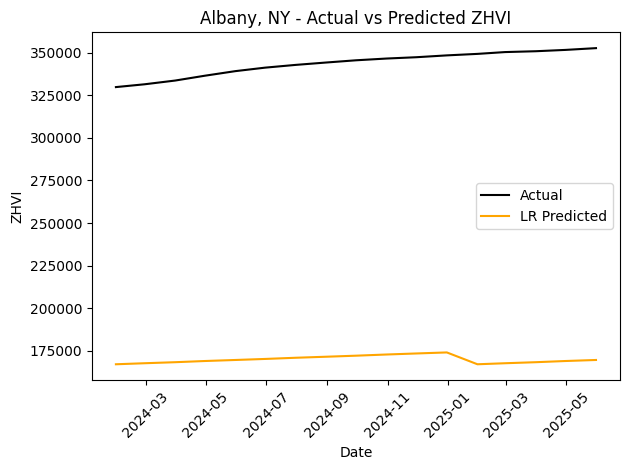

In [37]:
import matplotlib.pyplot as plt
albany_df = test_value_pred[(test_value_pred['RegionName'] == 'Albany, NY')]
plt.figure()
plt.plot(albany_df['Date'], albany_df['ZHVI'], label = 'Actual', color = 'black')
plt.plot(albany_df['Date'], albany_df['LinearRegression1_ZHVI_Predicted'], label = 'LR Predicted', color = 'orange')
plt.title('Albany, NY - Actual vs Predicted ZHVI')
plt.xlabel('Date')
plt.ylabel('ZHVI')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

### Improving the Predictions result by using Lag and Rolling methods. 
This simple method helps model to learn temporal trends and nuances better. 
- Lag features below represent past values of a time-dependent variable to capture temporal dependencies in the data. In this project, I use 1-month (ZHVI_lag_1) and 12-month (ZHVI_lag_12) lags to help the model recognize short-term trends and annual seasonality in housing prices. These features allow the forecasting model to learn from historical behavior and are essential in time series tasks where previous values influence future outcomes.

- Rolling features is used for smoothing - computes the moving average of past values over a fixed window to smooth out short term fluctuations and highlight longer term trends. Here, a 3-month (ZHVI_roll_3) and 6-month (ZHVI_roll_6) rolling averages of ZHVI is created to provide the model with momentum and trend awareness. These smoothed signals improve stability in predictions by reducing noise and emphasizing the general direction of price changes.

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
long_df['ZHVI_lag_1'] = long_df.groupby('RegionName')['ZHVI'].shift(1) #the numb inside () returns the num rows above value 1 month ago lag - local trends
long_df['ZHVI_lag_12'] = long_df.groupby('RegionName')['ZHVI'].shift(12) #12 months ago rag - resognizing seasonal 

In [39]:
# rollingmean (3) = (sum of 3 past months ZHVI / 3)
# rollingmean (6) = (sum of 6 past months ZHVI / 6)
# helpful for noise reduction and enhance model's better learning
long_df['ZHVI_roll_3'] = long_df.groupby('RegionName')['ZHVI'].rolling(3).mean().reset_index(0, drop=True)
long_df['ZHVI_roll_6'] = long_df.groupby('RegionName')['ZHVI'].rolling(6).mean().reset_index(0, drop=True)

In [40]:
long_df = long_df.dropna(subset=['ZHVI_lag_1', 'ZHVI_lag_12', 'ZHVI_roll_3', 'ZHVI_roll_6'])
long_df.reset_index(drop=True, inplace=True)

In [41]:
features = ['region_label', 'ZHVI_lag_1', 'ZHVI_lag_12', 'ZHVI_roll_3', 'ZHVI_roll_6', 'Month', 'Quarter']
target = 'ZHVI'
#split (time-based, not random)
train_df = long_df[long_df['Date'] < '2024-01-01'].copy()
test_df = long_df[(long_df['Date'] >= '2024-01-01')].copy()
#train
X_train = train_df[features]
y_train = train_df[target]
#test
X_test = test_df[features]
y_test = test_df[target]


In [42]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [43]:
reg_y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, reg_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, reg_y_pred)
sum_actual = np.sum(y_test)
mape = np.sum(np.abs((y_test - reg_y_pred))) / sum_actual * 100
accuracy = 100 - mape 

print("Test MSE: ", round(mse, 2))
print("Test RMSE: ", round(rmse, 2))
print("Test R^2: ", round(r2, 2))
print("Approx. Accuracy: ", round(accuracy, 2))


Test MSE:  468537.39
Test RMSE:  684.5
Test R^2:  1.0
Approx. Accuracy:  99.84


In [44]:
test_df['LinearRegression_ZHVI_Predicted'] = reg_y_pred
test_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,ZHVI,ZHVI_missing,Year,region_label,Month,Quarter,ZHVI_lag_1,ZHVI_lag_12,ZHVI_roll_3,ZHVI_roll_6,LinearRegression_ZHVI_Predicted
167,394297,677,"Aberdeen, SD",SD,2024-01-31,221348.747126,0,2024,0,1,1,220914.596291,218035.558034,221000.779577,220926.641938,221294.411876
168,394297,677,"Aberdeen, SD",SD,2024-02-29,221998.454840,0,2024,0,2,1,221348.747126,217311.326994,221420.599419,221091.085603,221858.242443
169,394297,677,"Aberdeen, SD",SD,2024-03-31,223245.822544,0,2024,0,3,1,221998.454840,217881.048083,222197.674837,221488.463446,223228.226625
170,394297,677,"Aberdeen, SD",SD,2024-04-30,224641.067313,0,2024,0,4,2,223245.822544,219092.637134,223295.114899,222147.947238,224288.178942
171,394297,677,"Aberdeen, SD",SD,2024-05-31,225944.722368,0,2024,0,5,2,224641.067313,221016.580228,224610.537408,223015.568414,225784.214708


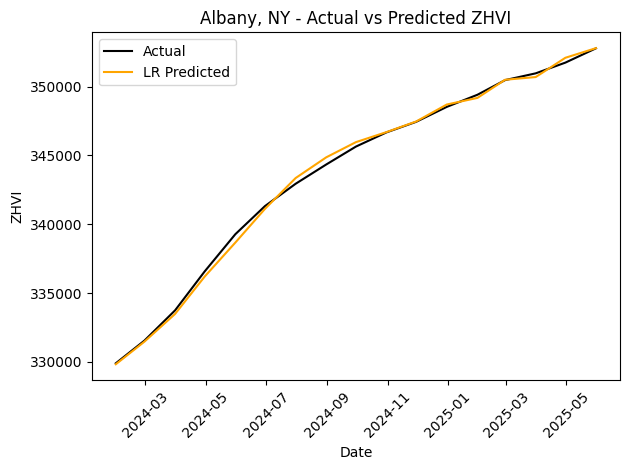

In [45]:
import matplotlib.pyplot as plt
albany_df = test_df[(test_df['RegionName'] == 'Albany, NY')]
plt.figure()
plt.plot(albany_df['Date'], albany_df['ZHVI'], label = 'Actual', color = 'black')
plt.plot(albany_df['Date'], albany_df['LinearRegression_ZHVI_Predicted'], label = 'LR Predicted', color = 'orange')
plt.title('Albany, NY - Actual vs Predicted ZHVI')
plt.xlabel('Date')
plt.ylabel('ZHVI')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()